# Deep Learning | Model Optimization

### Dataset: MNIST Fashion| Framework: Keras (Tensorflow)

🎯 Objective: Move from a basic MLP to a well-tuned model and benchmark against classical ML methods.
- Baseline MLP typically scores ~58–60% accuracy.
- Deep regularized MLPs can achieve ~80–94% with tuning.
- Tree-based methods like Random Forest or XGBoost may reach ~97%.

## 📌 Step 1: Load and Preprocess the Data

In [4]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load data
data = fetch_covtype()
X, y = data.data, data.target - 1  # make 0-indexed

In [7]:
X.shape

(581012, 54)

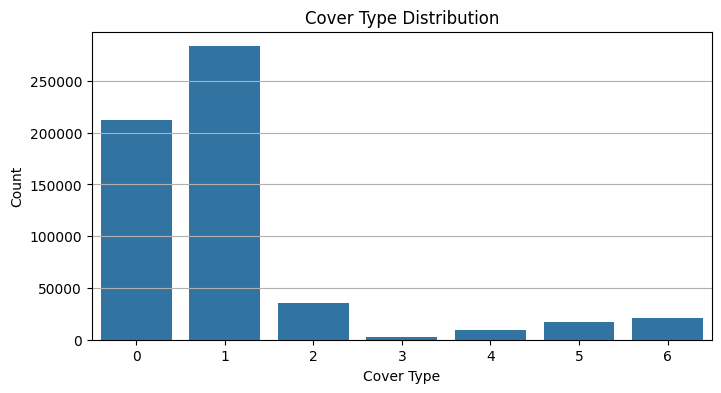

In [8]:
# Class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=y)
plt.title("Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

In [10]:
print("\nClass distribution:")
print(pd.Series(y).value_counts().sort_index())


Class distribution:
0    211840
1    283301
2     35754
3      2747
4      9493
5     17367
6     20510
Name: count, dtype: int64


In [11]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
X_train.shape

(464809, 54)

In [12]:
# Standardize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# # One-hot encode labels
# y_train_cat = to_categorical(y_train, num_classes=7)
# y_test_cat = to_categorical(y_test, num_classes=7)

## 📌 Step 2: Define and Train a Baseline MLP Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [11]:
baseline_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
baseline_model.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [13]:
history_baseline = baseline_model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7381 - loss: 0.6137 - val_accuracy: 0.8039 - val_loss: 0.4639
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8096 - loss: 0.4523 - val_accuracy: 0.8243 - val_loss: 0.4200
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8307 - loss: 0.4074 - val_accuracy: 0.8357 - val_loss: 0.3925
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8426 - loss: 0.3823 - val_accuracy: 0.8364 - val_loss: 0.4005
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8482 - loss: 0.3665 - val_accuracy: 0.8538 - val_loss: 0.3544
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8554 - loss: 0.3518 - val_accuracy: 0.8526 - val_loss: 0.3575
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8567 - loss: 0.3471 - val_accuracy: 0.8579 - val_loss: 0.3417
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8617 - loss: 0.3351 -

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

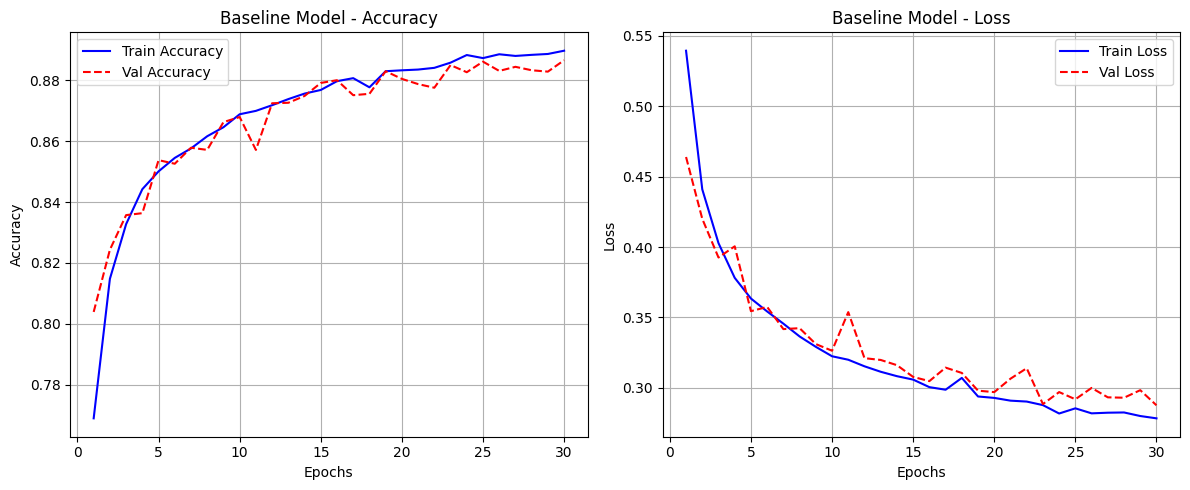

In [16]:
plot_learning_curves(history_baseline, title='Baseline Model')

In [17]:
loss1, acc1 = baseline_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8871 - loss: 0.2875
Test accuracy : 88.70%
Test loss     : 28.85%


# 3.1 NEURAL NETWORK ARCHITECTURE

Modify the baseline MLP architecture by exploring deeper or wider configurations.



*   Added another dense layer
*   Using Relu






In [18]:
baseline_model_more_layers = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

baseline_model_more_layers.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,543 (224.78 KB)

 Trainable params: 57,543 (224.78 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
baseline_model_more_layers.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [20]:
history_baseline_more_layers = baseline_model_more_layers.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7364 - loss: 0.6228 - val_accuracy: 0.8033 - val_loss: 0.4630
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8144 - loss: 0.4465 - val_accuracy: 0.8295 - val_loss: 0.4069
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8349 - loss: 0.3987 - val_accuracy: 0.8413 - val_loss: 0.3891
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8478 - loss: 0.3735 - val_accuracy: 0.8516 - val_loss: 0.3685
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8561 - loss: 0.3566 - val_accuracy: 0.8605 - val_loss: 0.3499
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8641 - loss: 0.3360 - val_accuracy: 0.8661 - val_loss: 0.3418
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3250 - val_accuracy: 0.8653 - val_loss: 0.3339
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3229 - 

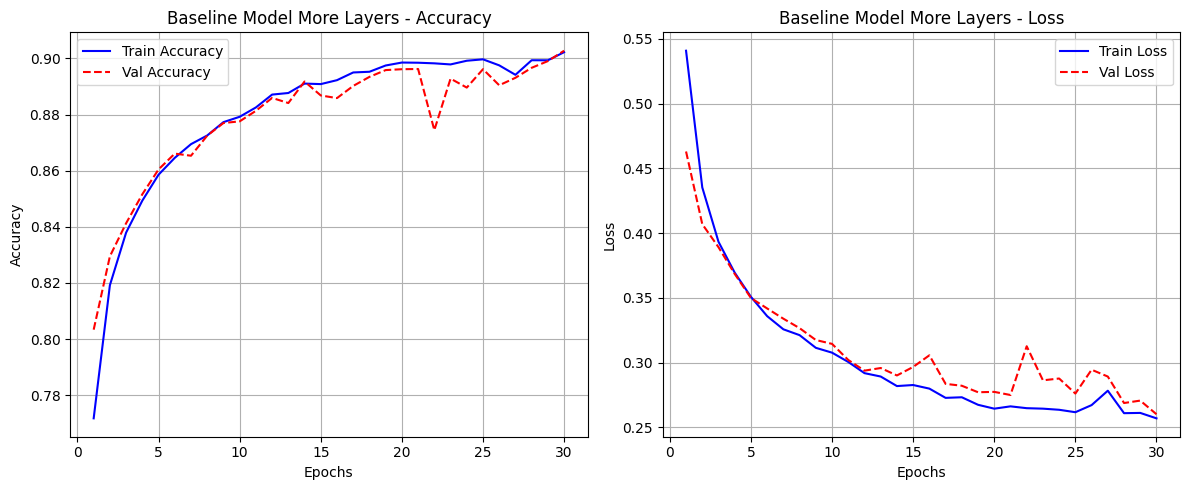

In [21]:
plot_learning_curves(history_baseline_more_layers, title='Baseline Model More Layers')

In [22]:
loss1, acc1 = baseline_model_more_layers.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9012 - loss: 0.2614
Test accuracy : 90.13%
Test loss     : 26.34%


By adding more dense layer model become slightly overfit as shown in graph.

Experiment with different activation functions (e.g., ReLU, LeakyReLU, SELU).

In [23]:
baseline_model_LeakyReLU = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(7, activation='softmax')
])

baseline_model_LeakyReLU.summary()

baseline_model_LeakyReLU.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_baseline_LeakyReLU = baseline_model_LeakyReLU.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7333 - loss: 0.6297 - val_accuracy: 0.7970 - val_loss: 0.4668
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8050 - loss: 0.4562 - val_accuracy: 0.8184 - val_loss: 0.4297
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8279 - loss: 0.4098 - val_accuracy: 0.8362 - val_loss: 0.3910
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8408 - loss: 0.3822 - val_accuracy: 0.8488 - val_loss: 0.3670
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8487 - loss: 0.3651 - val_accuracy: 0.8496 - val_loss: 0.3609
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8559 - loss: 0.3488 - val_accuracy: 0.8605 - val_loss: 0.3367
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8597 - loss: 0.3397 - val_accuracy: 0.8635 - val_loss: 0.3390
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.3277 - 

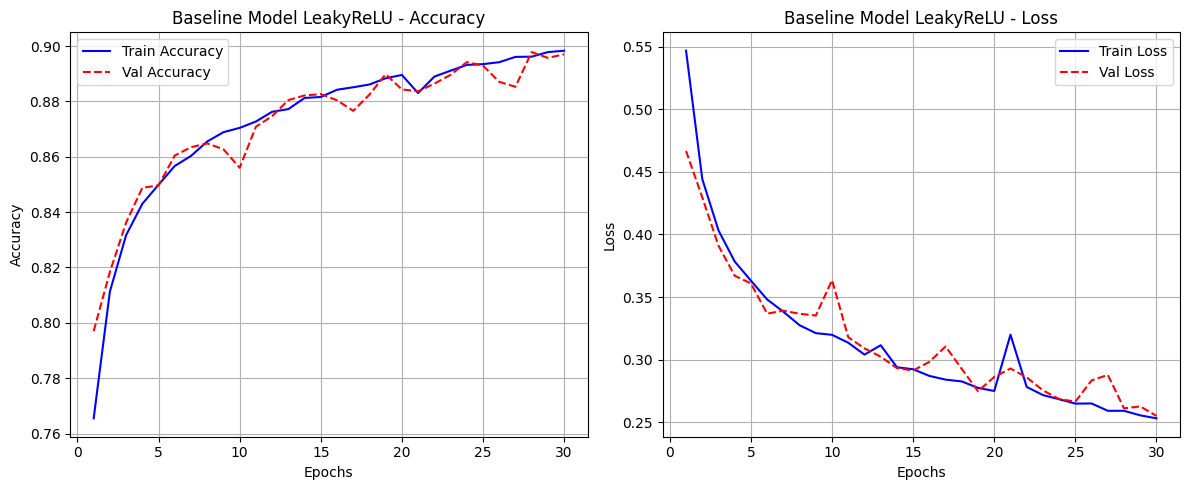

In [24]:
plot_learning_curves(history_baseline_LeakyReLU, title='Baseline Model LeakyReLU')

In [25]:
loss1, acc1 = baseline_model_LeakyReLU.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8965 - loss: 0.2563
Test accuracy : 89.76%
Test loss     : 25.66%


No major effect by changing on leaky relu. so in next steps we use relu.

Apply Batch Normalization where appropriate and explain your design choices.

In [26]:
baseline_model_Batch_Norm = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass
])

baseline_model_Batch_Norm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
baseline_model_Batch_Norm.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [28]:
history_baseline_Batch_Norm = baseline_model_Batch_Norm.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7421 - loss: 0.6213 - val_accuracy: 0.8178 - val_loss: 0.4364
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8204 - loss: 0.4243 - val_accuracy: 0.8442 - val_loss: 0.3737
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8431 - loss: 0.3756 - val_accuracy: 0.8609 - val_loss: 0.3383
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8567 - loss: 0.3448 - val_accuracy: 0.8648 - val_loss: 0.3260
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8631 - loss: 0.3289 - val_accuracy: 0.8765 - val_loss: 0.3003
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8685 - loss: 0.3157 - val_accuracy: 0.8807 - val_loss: 0.2917
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8737 - loss: 0.3052 - val_accuracy: 0.8839 - val_loss: 0.2847
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8794 - loss: 0.2946

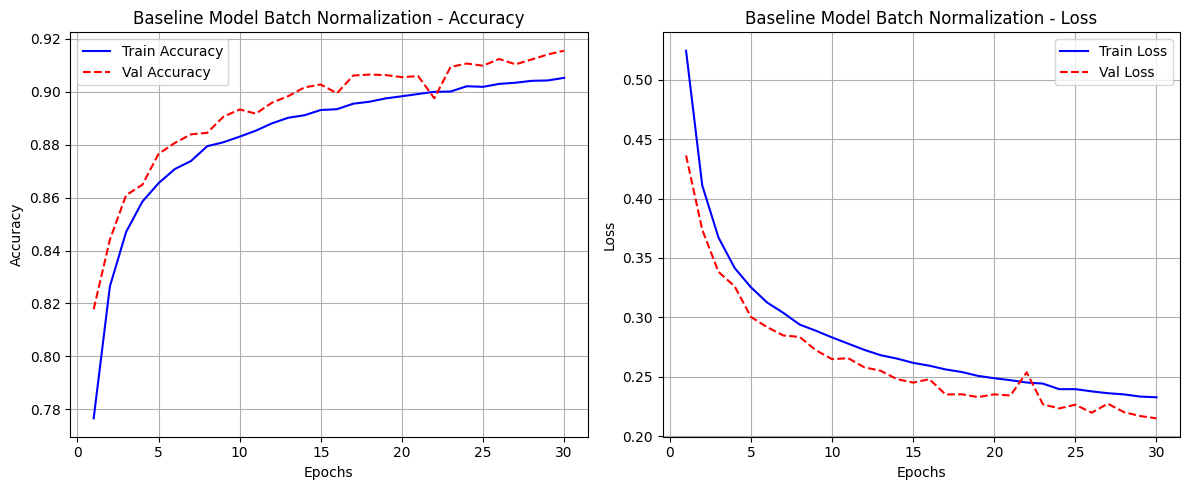

In [29]:
plot_learning_curves(history_baseline_Batch_Norm, title='Baseline Model Batch Normalization')

In [30]:
loss1, acc1 = baseline_model_Batch_Norm.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9148 - loss: 0.2152
Test accuracy : 91.55%
Test loss     : 21.45%


By adding batch normalization we improve accuracy and rduce loss.

# 3.2 REGULARIZATION TECHNIQUES

Apply Dropout to prevent overfitting and experiment with different dropout rates.

In [31]:
baseline_model_DropOut= Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass
])

baseline_model_DropOut.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
baseline_model_DropOut.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [33]:
history_baseline_DropOut = baseline_model_DropOut.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7116 - loss: 0.6916 - val_accuracy: 0.7826 - val_loss: 0.5097
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7649 - loss: 0.5504 - val_accuracy: 0.7982 - val_loss: 0.4708
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7792 - loss: 0.5197 - val_accuracy: 0.8116 - val_loss: 0.4405
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7871 - loss: 0.5030 - val_accuracy: 0.8188 - val_loss: 0.4277
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7908 - loss: 0.4929 - val_accuracy: 0.8254 - val_loss: 0.4137
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7940 - loss: 0.4874 - val_accuracy: 0.8277 - val_loss: 0.4088
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7976 - loss: 0.4770 - val_accuracy: 0.8304 - val_loss: 0.3998
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8020 - loss: 0.4722 -

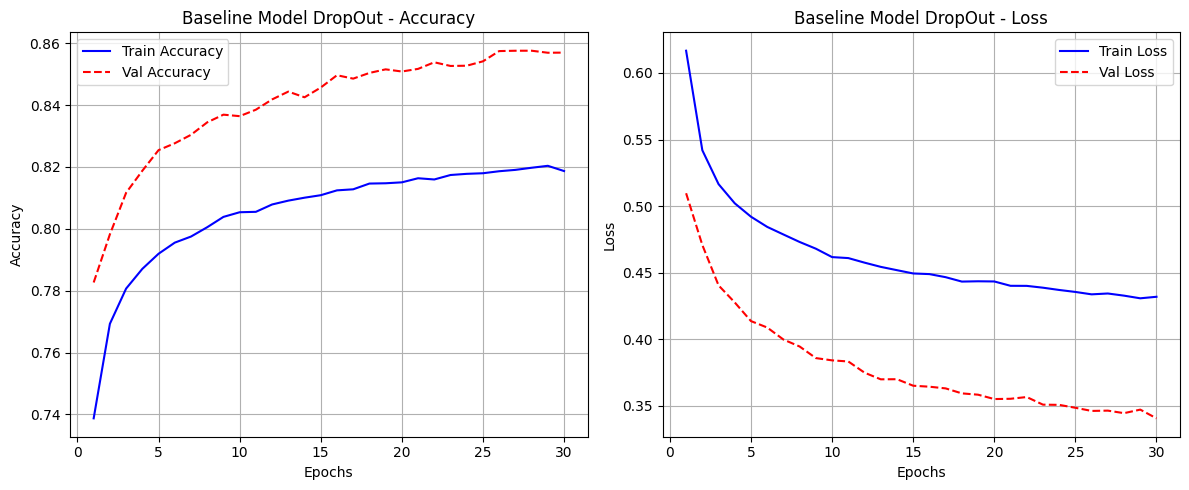

In [34]:
plot_learning_curves(history_baseline_DropOut, title='Baseline Model DropOut')

In [ ]:
loss1, acc1 = baseline_model_DropOut.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8510 - loss: 0.3462
Test accuracy : 85.12%
Test loss     : 34.72%


By adding drop out it reduce the test accuracy and increase the loss.

Add L2 regularization to Dense layers and

In [35]:
from tensorflow.keras.regularizers import l2

baseline_model_L2_Reg = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dense(64, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dense(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass
])
baseline_model_L2_Reg.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
baseline_model_L2_Reg.compile(optimizer=Adam(learning_rate=0.01),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [37]:
history_baseline_L2_Reg = baseline_model_L2_Reg.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7274 - loss: 0.7555 - val_accuracy: 0.7517 - val_loss: 0.6638
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7640 - loss: 0.6201 - val_accuracy: 0.7658 - val_loss: 0.6172
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7710 - loss: 0.5999 - val_accuracy: 0.7730 - val_loss: 0.5958
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7741 - loss: 0.5918 - val_accuracy: 0.7755 - val_loss: 0.5956
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7768 - loss: 0.5872 - val_accuracy: 0.7732 - val_loss: 0.6014
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7769 - loss: 0.5845 - val_accuracy: 0.7702 - val_loss: 0.5968
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7767 - loss: 0.5831 - val_accuracy: 0.7745 - val_loss: 0.5887
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7782 - loss: 0.5799 

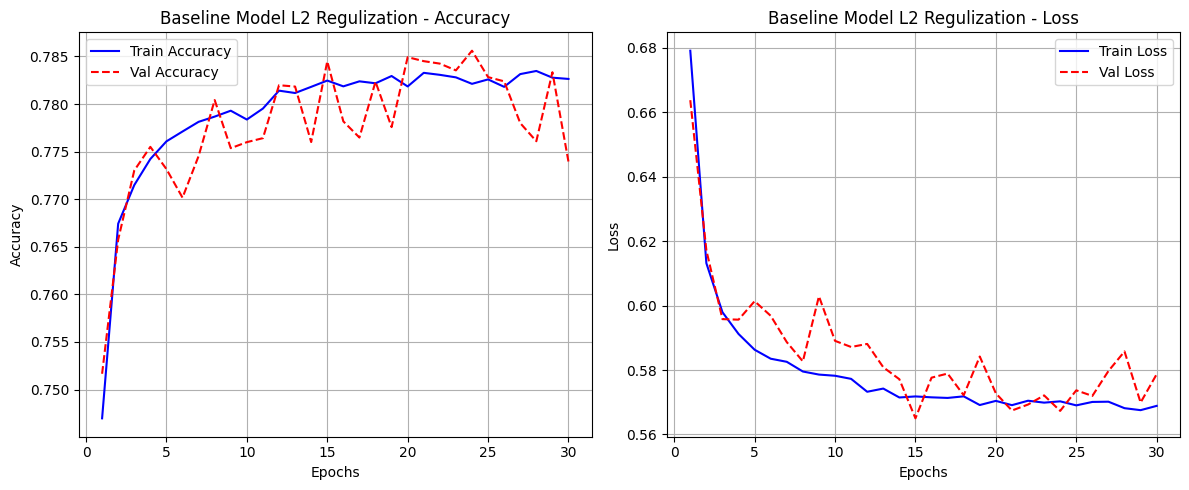

In [38]:
plot_learning_curves(history_baseline_L2_Reg, title='Baseline Model L2 Regulization')

In [39]:
loss1, acc1 = baseline_model_L2_Reg.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7756 - loss: 0.5779
Test accuracy : 77.43%
Test loss     : 57.95%


L2 regulazatin also not fit for this data set. it reduce accuracy and having increase loss. model is going underfit.

Lets 1 more test with dropout and l2 regulazation together.

In [40]:
baseline_model_Dropout_L2_Batch = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, kernel_regularizer=l2(0.0001)),  # Reduced L2 penalty
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),  # Slightly reduced dropout rate

    Dense(64, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32, kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass

])
baseline_model_Dropout_L2_Batch.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [41]:

baseline_model_Dropout_L2_Batch.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [42]:
history_baseline_Dropout_L2_Batch = baseline_model_Dropout_L2_Batch.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6439 - loss: 0.9396 - val_accuracy: 0.7601 - val_loss: 0.5794
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7434 - loss: 0.6235 - val_accuracy: 0.7828 - val_loss: 0.5229
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7624 - loss: 0.5764 - val_accuracy: 0.7971 - val_loss: 0.4924
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7730 - loss: 0.5515 - val_accuracy: 0.8093 - val_loss: 0.4694
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7815 - loss: 0.5329 - val_accuracy: 0.8158 - val_loss: 0.4556
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7876 - loss: 0.5211 - val_accuracy: 0.8192 - val_loss: 0.4463
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7915 - loss: 0.5124 - val_accuracy: 0.8276 - val_loss: 0.4307
Epoch 8/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7947 - loss: 0.5046

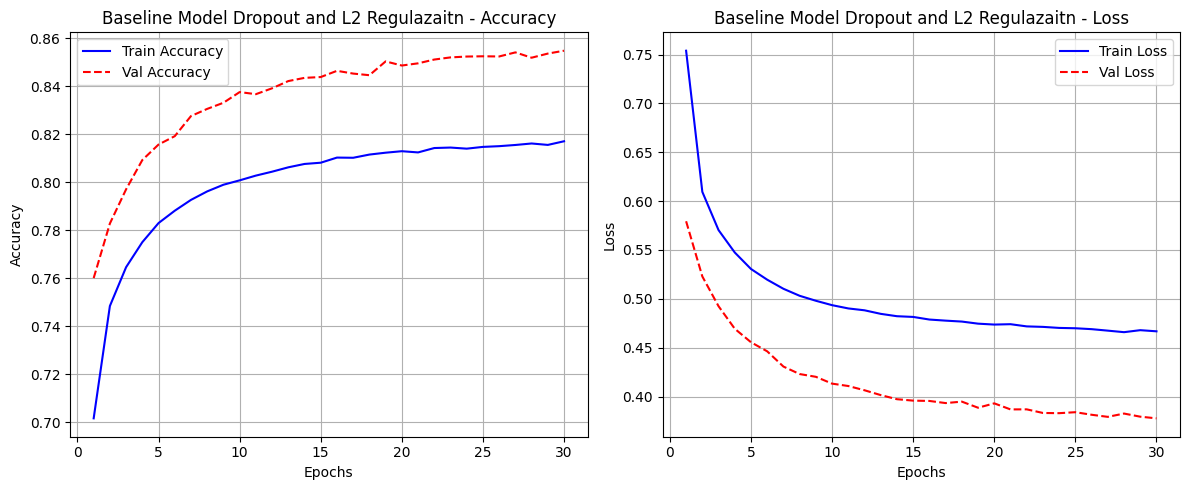

In [43]:
plot_learning_curves(history_baseline_Dropout_L2_Batch, title='Baseline Model Dropout and L2 Regulazaitn')

In [ ]:
loss1, acc1 = baseline_model_Dropout_L2_Batch.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8588 - loss: 0.3700
Test accuracy : 85.81%
Test loss     : 37.15%


Still no immprovemnt model perform underfit. for further testing we will not use dropout and l2regulaization. because this is not good for our dataset.

# 3.3 OPTIMIZER AND LEARNING RATE STRATEGY

Try multiple optimizers (e.g., Adam, RMSprop, SGD with momentum).

We have already use Adam now we are using SGD

In [ ]:
# Define function to train model with a given learning rate
def train_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),

        Dense(32),
        BatchNormalization(),
        Activation('relu'),

        Dense(7, activation='softmax')  # Output layer with softmax for multiclass
    ])

    model.compile(optimizer=SGD(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

# learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
learning_rates = [0.1,0.5, 1.0,1.5]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")


Training with learning rate: 0.1
Final Training Accuracy: 0.8939
Final Training Loss: 0.2585
Final Validation Accuracy: 0.9036
Final Validation Loss: 0.2423

Training with learning rate: 0.5
Final Training Accuracy: 0.8995
Final Training Loss: 0.2447
Final Validation Accuracy: 0.9097
Final Validation Loss: 0.2274

Training with learning rate: 1.0
Final Training Accuracy: 0.9000
Final Training Loss: 0.2436
Final Validation Accuracy: 0.9089
Final Validation Loss: 0.2282

Training with learning rate: 1.5
Final Training Accuracy: 0.8987
Final Training Loss: 0.2472
Final Validation Accuracy: 0.9041
Final Validation Loss: 0.2353


In [ ]:
# Define function to train model with a given learning rate
def train_Adam_with_lr(lr):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128),
        BatchNormalization(),
        Activation('relu'),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),

        Dense(32),
        BatchNormalization(),
        Activation('relu'),

        Dense(7, activation='softmax')  # Output layer with softmax for multiclass
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=30,
                                      batch_size=256,
                                      verbose=0)

    return model, history

learning_rates = [0.0001, 0.001, 0.01, 0.1,0.5, 1.0,1.5]
histories = []
models = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, history = train_Adam_with_lr(lr)
    histories.append((lr, history))
    models.append((lr, model))

    final_train_acc = history.history['accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

Use learning rate scheduling strategies like ReduceLROnPlateau.

In [44]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the model (same as provided)
baseline_model_ReduceLROnPlateau = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass
])

# Display model summary
baseline_model_ReduceLROnPlateau.summary()

# Compile the model
baseline_model_ReduceLROnPlateau.compile(optimizer=Adam(learning_rate=0.01),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Monitor validation loss
    factor=0.5,                # Reduce learning rate by half
    patience=5,                # Wait 5 epochs before reducing
    min_lr=0.0001,             # Minimum learning rate
    verbose=1                  # Print message when learning rate is reduced
)

# Train the model with the callback
history_baseline_ReduceLROnPlateau = baseline_model_DropOut.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[reduce_lr],     # Add the ReduceLROnPlateau callback
    verbose=1
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8204 - loss: 0.4303 - val_accuracy: 0.8617 - val_loss: 0.3444 - learning_rate: 0.0100
Epoch 2/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8217 - loss: 0.4281 - val_accuracy: 0.8557 - val_loss: 0.3433 - learning_rate: 0.0100
Epoch 3/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8219 - loss: 0.4278 - val_accuracy: 0.8624 - val_loss: 0.3403 - learning_rate: 0.0100
Epoch 4/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8219 - loss: 0.4262 - val_accuracy: 0.8614 - val_loss: 0.3423 - learning_rate: 0.0100
Epoch 5/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8223 - loss: 0.4271 - val_accuracy: 0.8621 - val_loss: 0.3409 - learning_rate: 0.0100
Epoch 6/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8231 - loss: 0.4253 - val_accuracy: 0.8586 - val_loss: 0.3378 - learning_rate: 0.0100
Epoch 7/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8217 - l

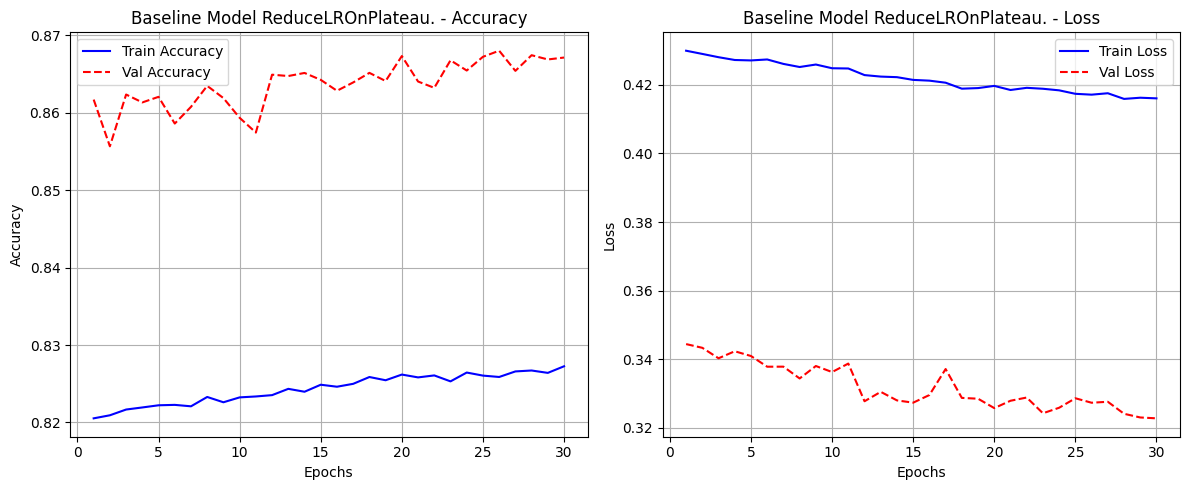

In [47]:
plot_learning_curves(history_baseline_ReduceLROnPlateau, title='Baseline Model ReduceLROnPlateau.')

In [46]:
loss1, acc1 = baseline_model_ReduceLROnPlateau.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1483 - loss: 1.9579
Test accuracy : 14.89%
Test loss     : 195.70%


Integrate EarlyStopping to halt training when validation performance stops improving.
Log training and validation performance per epoch.
Visualize training curves (accuracy and loss).

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback  # Corrected to Callback

baseline_model_EarlStoping = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(7, activation='softmax')  # Output layer with softmax for multiclass
])

# Display model summary
baseline_model_EarlStoping.summary()

# Compile the model
baseline_model_EarlStoping.compile(optimizer=Adam(learning_rate=0.01),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Custom callback to log metrics per epoch
class MetricsLogger(Callback):  # Corrected to inherit from Callback
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: loss={logs['loss']:.4f}, accuracy={logs['accuracy']:.4f}, "
              f"val_loss={logs['val_loss']:.4f}, val_accuracy={logs['val_accuracy']:.4f}")

# Train the model with callbacks
history = baseline_model_EarlStoping.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[reduce_lr, early_stopping, MetricsLogger()],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = baseline_model_EarlStoping.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,503 (72.28 KB)

 Trainable params: 18,055 (70.53 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7470 - loss: 0.6048Epoch 1: loss=0.5180, accuracy=0.7804, val_loss=0.4349, val_accuracy=0.8191
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7470 - loss: 0.6048 - val_accuracy: 0.8191 - val_loss: 0.4349 - learning_rate: 0.0100
Epoch 2/30
1446/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4242Epoch 2: loss=0.4115, accuracy=0.8277, val_loss=0.3726, val_accuracy=0.8465
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8219 - loss: 0.4241 - val_accuracy: 0.8465 - val_loss: 0.3726 - learning_rate: 0.0100
Epoch 3/30
1447/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3751Epoch 3: loss=0.3691, accuracy=0.8462, val_loss=0.3524, val_accuracy=0.8534
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8427 - loss: 0.3750 - val_accuracy: 0.8534 - val_loss: 0.3524 - learning_rate: 0.0100
Epoch 4/30
1440/1453 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8552 - loss: 

More testing to optimizing results


In [19]:
baseline_model_Optimize = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')
])

baseline_model_Optimize.summary()

baseline_model_Optimize.compile(optimizer=Adam(learning_rate=0.001),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

class MetricsLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: loss={logs['loss']:.4f}, accuracy={logs['accuracy']:.4f}, "
              f"val_loss={logs['val_loss']:.4f}, val_accuracy={logs['val_accuracy']:.4f}")

history = baseline_model_Optimize.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[reduce_lr, early_stopping, MetricsLogger()],
    verbose=1
)

test_loss, test_accuracy = baseline_model_Optimize.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,935 (800.53 KB)

 Trainable params: 203,015 (793.03 KB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/100
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6829 - loss: 2.5268Epoch 1: loss=1.3106, accuracy=0.7129, val_loss=0.7341, val_accuracy=0.7368
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6829 - loss: 2.5264 - val_accuracy: 0.7368 - val_loss: 0.7341 - learning_rate: 0.0010
Epoch 2/100
2898/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7309 - loss: 0.7610Epoch 2: loss=0.7501, accuracy=0.7334, val_loss=0.7100, val_accuracy=0.7426
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7309 - loss: 0.7609 - val_accuracy: 0.7426 - val_loss: 0.7100 - learning_rate: 0.0010
Epoch 3/100
2895/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.7325Epoch 3: loss=0.7253, accuracy=0.7391, val_loss=0.6796, val_accuracy=0.7513
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7372 - loss: 0.7325 - val_accuracy: 0.7513 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 4/100
2904/2906 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - 

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


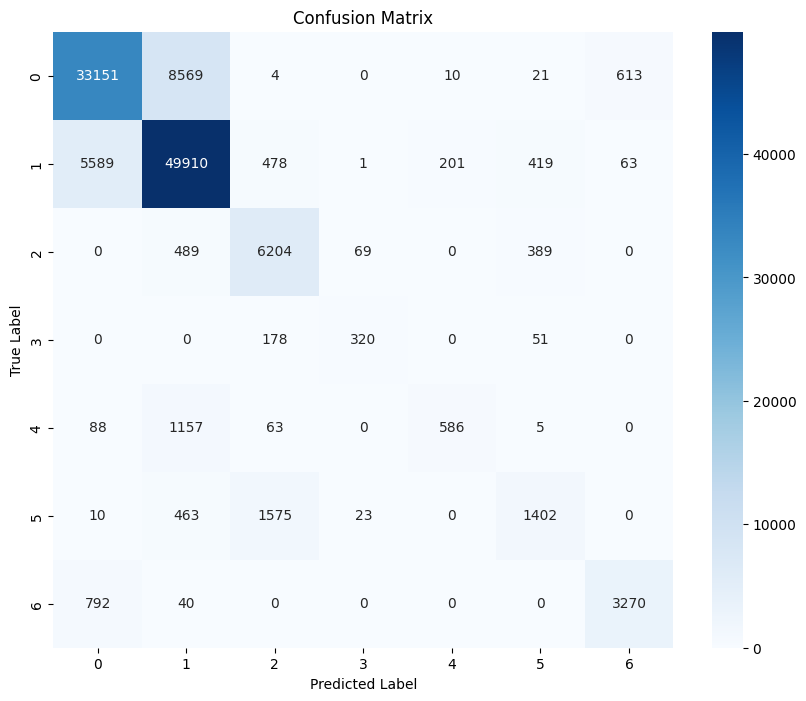

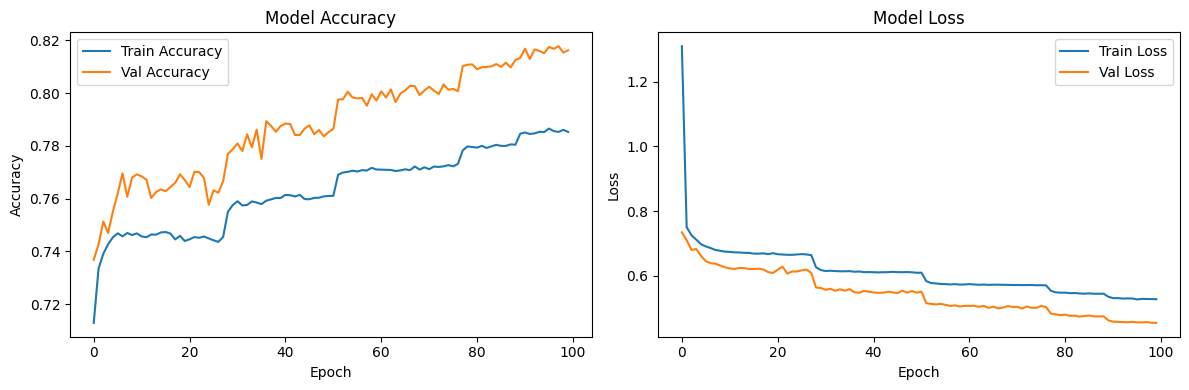

Test accuracy: 0.8162
Test loss: 0.4541


In [26]:
from sklearn.metrics import confusion_matrix

# Evaluate and generate confusion matrix
y_pred = baseline_model_Optimize.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Final evaluation
test_loss, test_accuracy = baseline_model_Optimize.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

In [27]:
baseline_model_Optimize_try = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.2),


    Dense(7, activation='softmax')

])

baseline_model_Optimize_try.summary()

baseline_model_Optimize_try.compile(optimizer=Adam(learning_rate=0.001),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)


history = baseline_model_Optimize_try.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_accuracy = baseline_model_Optimize.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │        28,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,919 (808.28 KB)

 Trainable params: 204,935 (800.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.6614 - loss: 0.9252 - val_accuracy: 0.7736 - val_loss: 0.5197
Epoch 2/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7609 - loss: 0.5631 - val_accuracy: 0.8045 - val_loss: 0.4567
Epoch 3/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7845 - loss: 0.5099 - val_accuracy: 0.8245 - val_loss: 0.4185
Epoch 4/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8002 - loss: 0.4754 - val_accuracy: 0.8390 - val_loss: 0.3858
Epoch 5/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.8111 - loss: 0.4526 - val_accuracy: 0.8462 - val_loss: 0.3685
Epoch 6/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8194 - loss: 0.4349 - val_accuracy: 0.8588 - val_loss: 0.3476
Epoch 7/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8266 - loss: 0.4196 - val_accuracy: 0.8631 - val_loss: 0.3339
Epoch 8/30
2906/2906 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8317 - loss: 0

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


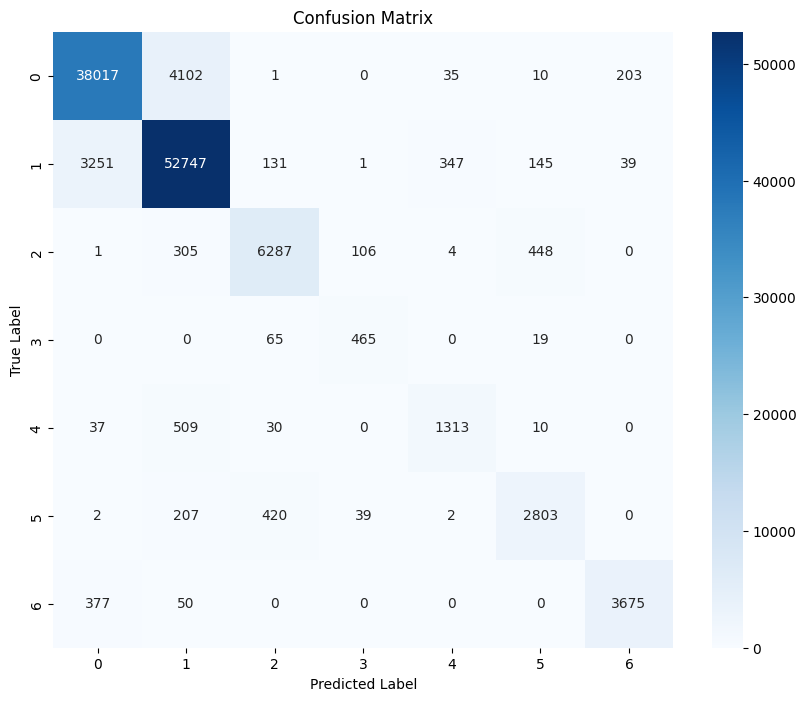

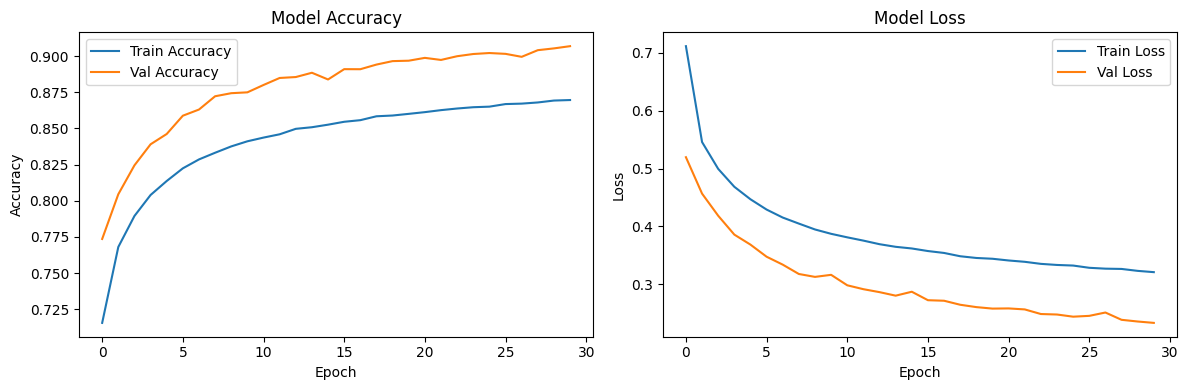

Test accuracy: 0.8162
Test loss: 0.4541


In [28]:
# Evaluate and generate confusion matrix
y_pred = baseline_model_Optimize_try.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Final evaluation
test_loss, test_accuracy = baseline_model_Optimize.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Random forest

Random Forest Test Accuracy: 0.8893


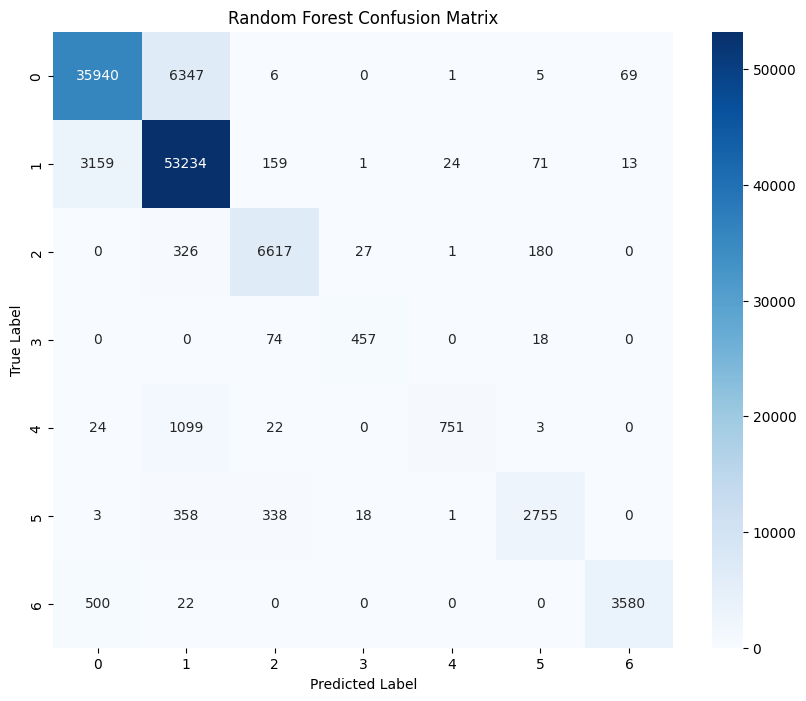

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_train_classes = y_train
    y_test_classes = y_test

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train_classes)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_classes, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Generate confusion matrix
cm_rf = confusion_matrix(y_test_classes, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_classes = np.argmax(y_train, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_train_classes = y_train
    y_test_classes = y_test

# Feature engineering: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature reduction: Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Number of components after PCA: {pca.n_components_}")

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest and perform hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3,
                                  random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train_pca, y_train_classes)

# Best model
best_rf_model = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# Predict on test set
y_pred_rf = best_rf_model.predict(X_test_pca)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_classes, y_pred_rf)
print(f"Enhanced Random Forest Test Accuracy: {rf_accuracy:.4f}")

# Generate confusion matrix
cm_rf = confusion_matrix(y_test_classes, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Enhanced Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Number of components after PCA: 43
Fitting 3 folds for each of 50 candidates, totalling 150 fits


By using random forest we get more accuracy.
Tree-based ensemble methods like Random Forest often outperform MLPs on structured/tabular datasets because they effectively handle non-linear relationships and feature interactions without requiring extensive preprocessing, as seen in the improved accuracy with PCA and tuning in my results. MLPs, relying on dense layers, struggle with high-dimensional tabular data unless heavily regularized, often overfitting or requiring more manual feature engineering.